# Question 1

In [2]:
free_matrix = 
[
0 0 1 1 0 0 0 1 1 0 0 0 0;
0 1 1 0 0 0 0 0 1 1 0 0 0;
0 0 0 1 1 0 1 1 0 1 1 1 1;
0 0 0 1 1 1 1 1 1 1 1 1 0;
0 0 0 0 0 0 1 1 1 0 0 0 0;
0 1 1 0 0 0 0 0 1 1 0 0 0;
0 0 0 1 1 1 1 0 0 0 0 0 0;
1 1 0 0 0 0 0 0 0 0 1 1 1;
1 1 1 0 0 0 0 0 0 1 1 0 0;
0 0 0 0 0 0 0 1 1 0 0 0 0;
0 0 0 0 0 0 1 1 1 0 0 0 0;
1 1 0 0 0 1 1 1 1 0 0 1 1;
1 1 1 0 1 1 0 0 0 0 0 1 1;
0 1 1 1 0 0 0 0 0 0 0 0 0;
1 1 0 0 1 1 0 0 0 0 0 0 0;
]

demand = [1 1 1 1 1 1 3 1 1 1 1 1 1]
times = ["10:00", "10:20" ,"10:40", "11:00", "11:20", "11:40", "Lunch", "1:00", "1:20", "1:40" , "2:00", "2:20", "2:40"]
names = ["Manuel" , "Luca" , "Jule" , "Michael", "Malte", "Chris", "Spyros", "Mirjam", "Matt", "Florian", "Josep", "Joel" ,"Tom" , "Daniel" ,"Anne"]

15-element Array{String,1}:
 "Manuel" 
 "Luca"   
 "Jule"   
 "Michael"
 "Malte"  
 "Chris"  
 "Spyros" 
 "Mirjam" 
 "Matt"   
 "Florian"
 "Josep"  
 "Joel"   
 "Tom"    
 "Daniel" 
 "Anne"   

In [3]:
using JuMP
m = Model()
@variable(m, x[1:15,1:13] >= 0)
for i in 1:15
    @constraint(m , dot(x[i,:], free_matrix[i,:]) == 1)
end
for i in 1:13
    @constraint(m, sum(x[:,i]) == demand[i])
end
solve(m)

:Optimal

### Final Schedule

In [29]:
x_val = getvalue(x)
for t in 1:13
    print(times[t], ": ")
    for i in 1:15
        if x_val[i, t] > 0
            print(names[i] , " ")
        end
    end
    println()
end

10:00: Joel 
10:20: Chris 
10:40: Tom 
11:00: Daniel 
11:20: Anne 
11:40: Spyros 
Lunch: Michael Malte Josep 
1:00: Manuel 
1:20: Florian 
1:40: Luca 
2:00: Matt 
2:20: Mirjam 
2:40: Jule 


# Question 2

In [9]:
pos = [
    0 20 18 30 35 33 5 5 11 2;
    0 20 10 12 0 25 27 10 0 15
]
required = [10 6 8 11 9 7 15 7 9 12]
present = [8 13 4 8 12 2 14 11 15 7]
distances = zeros( 10,10)
for i in 1:10
    for j in 1:10
        delta = pos[:,i] - pos[:,j]
        distances[i,j] = sqrt(dot(delta,delta))
    end
end


In [10]:
m = Model()
@variable(m, x[1:10,1:10] >= 0)
for i in 1:10
    @constraint(m, sum(x[:,i]) - sum(x[i,:]) + present[i] == required[i])
end
@objective(m,Min, 1.3*0.5*sum(distances .* x))
solve(m)
print(getobjectivevalue(m))

152.63901632295628

### Optimal movement is

In [11]:
x_val = getvalue(x)

for i in 1:10
    for j in 1:10
        val = x_val[i,j]
        if val > 0
            println("Agency ", i , " sends " ,  x_val[i,j] , " cars to agency ", j )
        end
    end
end

Agency 2 sends 1.0 cars to agency 3
Agency 2 sends 5.0 cars to agency 6
Agency 2 sends 1.0 cars to agency 7
Agency 5 sends 3.0 cars to agency 4
Agency 8 sends 5.0 cars to agency 10
Agency 9 sends 2.0 cars to agency 1
Agency 9 sends 3.0 cars to agency 3
Agency 9 sends 1.0 cars to agency 8


# Question 3
## a.

In [53]:
duration = [2; 16; 9 ; 8; 10 ; 6 ; 2 ;2 ; 9 ; 5 ;3 ;2 ;1 ;7 ;4 ;3 ;9 ;1; 0]
pred = zeros(19,19)
pred[2,1]=1
pred[3,2]=1
pred[4,2]=1
pred[5,3]=1
pred[6,4] = 1
pred[6,5] = 1
pred[7,4] =1
pred[8,6] = 1
pred[9,4] = 1
pred[9,6] = 1
pred[10,4] = 1
pred[11,6] = 1
pred[12,9] = 1
pred[13,7] = 1
pred[14,2] = 1
pred[15,4] = 1
pred[15,14] = 1
pred[16,8] = 1
pred[16,11] = 1
pred[16,14] = 1
pred[17,12] =1
pred[18,17] = 1
for i in 1:18
    pred[19,i] = 1
end



In [61]:
m = Model()
@variable(m, x[1:19] >= 0)
for i in 1:19
    for j in 1:19
        if pred[i,j] > 0
            @constraint(m, x[i] >= x[j] + duration[j])
        end
    end
end
@objective(m,Min, x[19])
solve(m)


:Optimal

### The earliest possible time to finish is 

In [63]:
getobjectivevalue(m)

64.0

## b.

In [72]:
max_reduction = [0; 3; 1; 2; 2; 1; 1; 0; 2; 1; 1; 0; 0; 2; 2; 1; 3; 0]
reduction_cost = [0; 30; 26; 12; 17; 15; 8; 0; 42; 21; 18; 0 ; 0; 22; 12; 6; 16; 0]

times = zeros(0)
costs = zeros(0)

for weeks_early in 0:64
    m = Model()
    @variable(m, x[1:19] >= 0)
    @variable(m, reduc[1:18]>=0)
    for i in 1:19
        for j in 1:19
            if pred[i,j] > 0
                @constraint(m, x[i] >= x[j] + duration[j] - reduc[j])
            end
        end
    end
    @constraint(m,x[19] == 64 - weeks_early)
    @constraint(m, reduc .<= max_reduction)
    @objective(m,Min, dot(reduction_cost,reduc))
    solve(m)
    cost = getobjectivevalue(m)
    if isnan(cost)
        break
    end
    append!(times, weeks_early)
    append!(costs, cost)
end
    

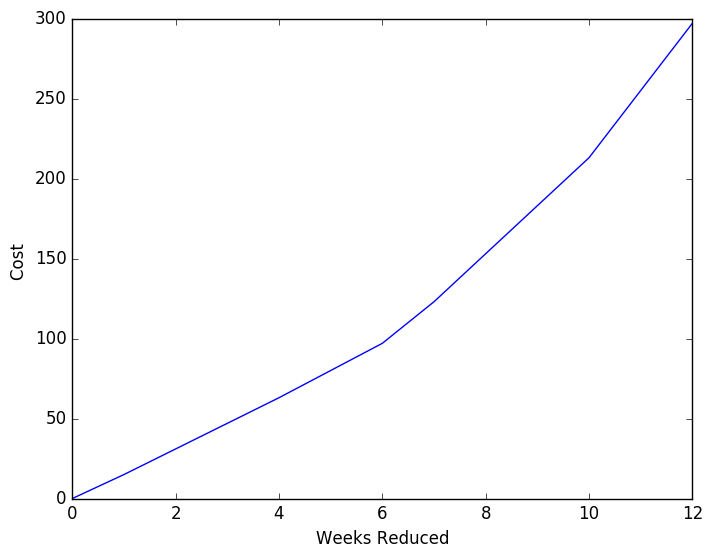

PyObject <matplotlib.text.Text object at 0x7fa04fc0ca20>

In [74]:
using PyPlot
plot(times,costs)
xlabel("Weeks Reduced")
ylabel("Cost ")

In [75]:
times

13-element Array{Float64,1}:
  0.0
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0
 11.0
 12.0

## c.

### To maximize profit the project will be completed

In [76]:
m = Model()
@variable(m, x[1:19] >= 0)
@variable(m, reduc[1:18]>=0)
@variable(m, weeks_early >= 0)

for i in 1:19
    for j in 1:19
        if pred[i,j] > 0
            @constraint(m, x[i] >= x[j] + duration[j] - reduc[j])
        end
    end
end
@constraint(m,x[19] == 64 - weeks_early)
@constraint(m, reduc .<= max_reduction)
@objective(m,Max, 30 * weeks_early - dot(reduction_cost,reduc))
solve(m)
println(getvalue(weeks_early) , " weeks early.")

7.0 weeks early.


# Question 4
## a.

In [2]:
using JuMP, PyPlot

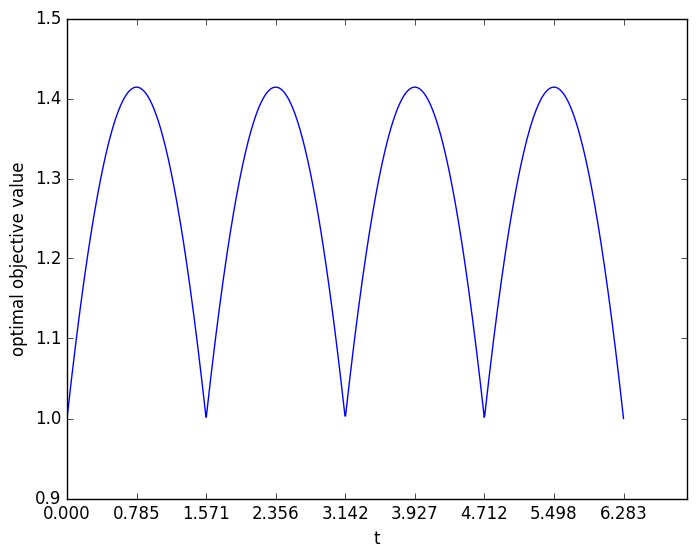

(Any[PyObject <matplotlib.axis.XTick object at 0x7f337eaff2e8>,PyObject <matplotlib.axis.XTick object at 0x7f337eaff470>,PyObject <matplotlib.axis.XTick object at 0x7f337eb5b4a8>,PyObject <matplotlib.axis.XTick object at 0x7f337eb24198>,PyObject <matplotlib.axis.XTick object at 0x7f337eb24ba8>,PyObject <matplotlib.axis.XTick object at 0x7f337eb265f8>,PyObject <matplotlib.axis.XTick object at 0x7f337eb27048>,PyObject <matplotlib.axis.XTick object at 0x7f337eb27a58>,PyObject <matplotlib.axis.XTick object at 0x7f337eb2b4a8>],Any[PyObject <matplotlib.text.Text object at 0x7f337eafdd30>,PyObject <matplotlib.text.Text object at 0x7f337eb5b588>,PyObject <matplotlib.text.Text object at 0x7f337eb20f98>,PyObject <matplotlib.text.Text object at 0x7f337eb249e8>,PyObject <matplotlib.text.Text object at 0x7f337eb26438>,PyObject <matplotlib.text.Text object at 0x7f337eb26e48>,PyObject <matplotlib.text.Text object at 0x7f337eb27898>,PyObject <matplotlib.text.Text object at 0x7f337eb2b2e8>,PyObject <ma

In [7]:
t_values = zeros(0)
obj_values = zeros(0)

for t in linspace(0,2pi,1000)
    m = Model()
    @variable(m,p>=0)
    @variable(m,q>=0)
    @variable(m,r>=0)
    @variable(m,s>=0)
    @constraint(m,p-r == cos(t))
    @constraint(m,q-s == sin(t))
    @objective(m,Min,p+q+r+s)
    solve(m)
    append!(t_values,t)
    append!(obj_values, getobjectivevalue(m))
end
plot(t_values,obj_values)
xlabel("t")
ylabel("optimal objective value")
xticks(linspace(0,2pi,9))

### Analysis of graph
There are four cases for the value of t that can be explained.

#### Case 1: $0 \leq t \leq \pi / 2$
Here $sin(t) \geq 0$ and $cos(t) \geq 0$ so to mininimize our objective we would always set $r = s = 0$, $p = cos(t)$ and $q = sin(t)$. Therefore our optimal objective value is $cos(t) + sin(t)$ which explains this portion of the plot.

#### Case 2: $\pi / 2 \leq t \leq \pi$
Here $sin(t) \geq 0$ and $cos(t) \leq 0$, so to minimize our objective here we would set
$p = s = 0$ and $r = -cos(t) = cos(\pi - t)$ and $q = sin(t) = sin(\pi - t)$. Therefore our objective is $sin(\pi -t) + cos(\pi - t)$, which would give the same shape as in case 1.

#### Case 3: $\pi \leq t \leq 3\pi/2$
Here $sin(t) \leq 0$ and $cos(t) \leq 0$. So to minimize we set $p = q = 0$, and $r = -cos(t) = cos(t-\pi)$ and $q = -sin(t) = sin(t-\pi)$, so our objective function would be $cos(t-\pi) + sin(t - \pi)$ which should have the same shape as case 1.

#### Case 4: $3\pi/2 \leq t \leq 2\pi$ 
Here $sin(t) \leq 0$ and $cos(t) \geq 0$. So to minimize the objective we would set $r = q = 0$, and $p = cos(t) = cos(2\pi - t)$ and $s = -sin(t) = sin(2\pi - t)$. Then our objective function would be $cos(2\pi -t) + sin(2\pi - t)$. Which would have the same shape as case 1. 


## b.
First change the original problem so that it is in a form we can convert to the dual,

$$ -\max_{p,q,r,s} \text{  } -[1,1,1,1]^T [p,q,r,s]$$
$$\text{s.t.   } \begin{bmatrix}
1 & 0 & -1 & 0 \\
-1 & 0 & 1 & 0 \\
0 & 1 & 0 & -1 \\
0 & -1 & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix}
p\\
q\\
r\\
s
\end{bmatrix} \leq 
\begin{bmatrix}
cos(t)\\
-cos(t)\\
sin(t)\\
-sin(t)
\end{bmatrix}
$$
$$ p,q,r,s \geq 0$$

So then the dual becomes
$$ -\min_{\lambda} \text{  } 
\begin{bmatrix}
cos(t)& -cos(t) & sin(t) & -sin(t)\\
\end{bmatrix}
\lambda
$$
s.t. $$
\lambda \geq 0$$
$$\begin{bmatrix}
1 & -1 & 0 & 0\\
0 & 0 & 1 & -1\\
-1 & 1 & 0 & 0\\
0 & 0 & -1 & 1
\end{bmatrix}
\lambda \geq -[1,1,1,1]^T
$$



By the constraints of the dual, $|\lambda_1 - \lambda_2| \leq 1$ and $|\lambda_3 - \lambda_4| \leq 1$ and by looking at the objective we can tell that the optimal solution is when $|\lambda_1 - \lambda_2| = 1$ and $|\lambda_3 - \lambda_4| = 1$. If our $\lambda$ is optimal then our objective can only take one of 4 values,
$$
(cos(t) + sin(t))\text{, } (-cos(t) + sin(t))\text{, } (-cos(t) - sin(t)) \text{ or } (cos(t) - sin(t))
$$
These are the same values the original problem could take at optimum. 
And as you can see below from optimizing on the dual we get the same plot.

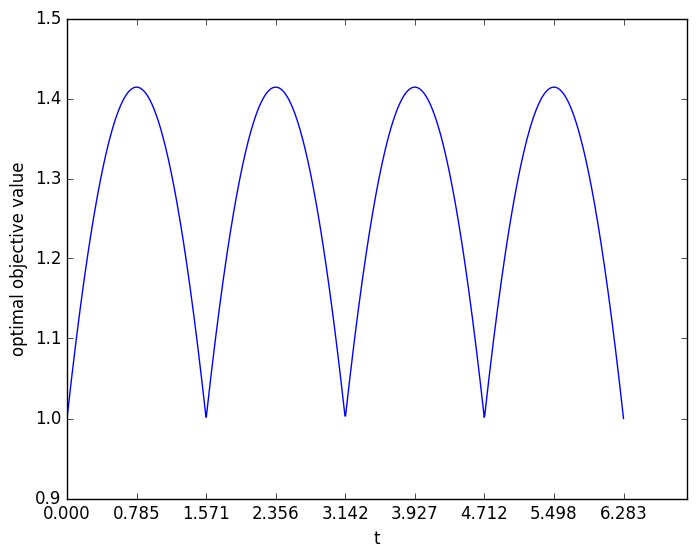

(Any[PyObject <matplotlib.axis.XTick object at 0x7f8efd1825f8>,PyObject <matplotlib.axis.XTick object at 0x7f8efd182828>,PyObject <matplotlib.axis.XTick object at 0x7f8efd6d3e80>,PyObject <matplotlib.axis.XTick object at 0x7f8efd1344a8>,PyObject <matplotlib.axis.XTick object at 0x7f8efd134eb8>,PyObject <matplotlib.axis.XTick object at 0x7f8efd136908>,PyObject <matplotlib.axis.XTick object at 0x7f8efd139358>,PyObject <matplotlib.axis.XTick object at 0x7f8efd139d68>,PyObject <matplotlib.axis.XTick object at 0x7f8efd13f7b8>],Any[PyObject <matplotlib.text.Text object at 0x7f8efd178860>,PyObject <matplotlib.text.Text object at 0x7f8efd6eef60>,PyObject <matplotlib.text.Text object at 0x7f8efd1342e8>,PyObject <matplotlib.text.Text object at 0x7f8efd134cf8>,PyObject <matplotlib.text.Text object at 0x7f8efd136748>,PyObject <matplotlib.text.Text object at 0x7f8efd139198>,PyObject <matplotlib.text.Text object at 0x7f8efd139ba8>,PyObject <matplotlib.text.Text object at 0x7f8efd13f5f8>,PyObject <ma

In [11]:
using JuMP, PyPlot
t_values = zeros(0)
obj_values = zeros(0)
A = [1 0 -1 0; -1 0 1 0; 0 1 0 -1; 0 -1 0 1]
c = [-1; -1; -1; -1]
for t in linspace(0,2pi,1000)
    b= [cos(t); -cos(t); sin(t); -sin(t)]
    m = Model()
    @variable(m, lambda[1:4] >= 0)
    @constraint(m,A'*lambda .>= c)
    @objective(m,Min, dot(b,lambda))
    solve(m)
    append!(t_values,t)
    append!(obj_values, -getobjectivevalue(m))
end
plot(t_values,obj_values)
xlabel("t")
ylabel("optimal objective value")
xticks(linspace(0,2pi,9))